# 7.1

In [7]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

%matplotlib inline

In [8]:
sample_size = 100
sample = st.norm.rvs(size = sample_size)
x = np.arange(1, sample_size + 1)

In [32]:
def bayes(a, sigma):
    return (a + sample.cumsum()/sigma**2)/(1 + x/sigma**2)   
def func():
    OMP = sample.cumsum() / x

    plt.figure(figsize=(15, 8))
    plt.plot(x, abs(OMP), alpha=0.5, color='red', label ='MLE')
    plt.plot(x, abs(bayes(0,1)), alpha=0.5, color='blue', label ='N(0,1)')
    plt.plot(x, abs(bayes(0,100)), alpha=0.5, color='green', label ='N(0,100)')
    plt.plot(x, abs(bayes(10,1)), alpha=0.5, color='orange', label ='N(10,1)')
    plt.plot(x, abs(bayes(10,100)), alpha=0.5, color='purple', label ='N(10,100)')
    plt.ylim([0, 1])
    plt.xlim([1,100])
    plt.grid()
    plt.legend()
    plt.show()
        

$X_1, ..., X_{100}$ - выборка из распределения $N(0, 1)$. Для модели $N(\theta, 1)$ построим графики $f(n) = |\theta_1 - \theta|$, где $\theta_1$ - оценка $\theta$, полученная:

- методом максимального правдоподобия
- с помощью байесовского подхода (в качестве априорного распределения возьмем $N(0, 1), N(0, 100), N(10, 1), N(10, 100)$)

Оценка максимального правдоподобия: $\theta_1 = \overline{X}$

Байесовская оценка (априорное $N(a, \sigma)$): $\theta_1 = (\frac{a}{\sigma_0^2} + \frac{\sum_{i = 1}^{n}x_i}{\sigma^2})/(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2})= (a + \frac{\sum_{i = 1}^{n}x_i}{\sigma^2})/(1 + \frac{n}{\sigma^2})$

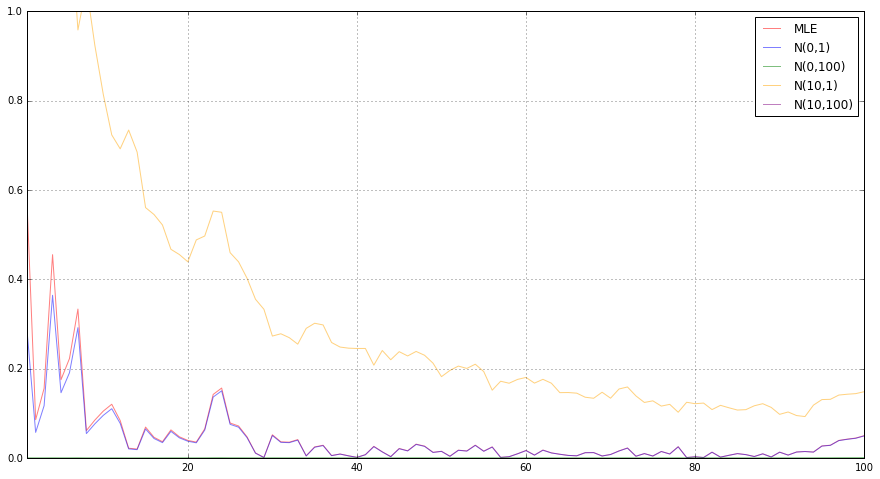

In [33]:
func()

Из графика видно, что оценка максимального правдободобия и байесовские оценки при априорном распределении $N(0,1), N(0,100), N(10,1), N(10,100)$ практически совпадают и хорошо приближают $\theta$

In [56]:
def gam_est(alpha, betha):
    est = np.zeros(sample_size)
    for k in range(1, sample_size):
        est[k] = (betha + 1/2 * sum([(i)**2 for i in sample[:k]])) / (alpha - 1 + k/2)
    return (est)                                                          
        
def func_2():
    OMP = np.zeros(sample_size)
    for i in range(1, sample_size):
        OMP[i] = (sample[:i]**2).mean() - (sample[:i].mean())**2

    plt.figure(figsize=(15, 8))
    plt.plot(x, abs(1 - OMP), alpha=0.5, color='red', label ='MLE')
    plt.plot(x, abs(1 - gam_est(1,1)), alpha=0.5, color='blue', label ='(1,1)')
    plt.plot(x, abs(1 - gam_est(1,100)), alpha=0.5, color='green', label ='(1,100)')
    plt.plot(x, abs(1 - gam_est(10,1)), alpha=0.5, color='orange', label ='(10,1)')
    plt.plot(x, abs(1 - gam_est(10,100)), alpha=0.5, color='purple', label ='(10,100)')
    plt.ylim([0, 5])
    plt.xlim([1,100])
    plt.grid()
    plt.legend()
    plt.show()
        

Проделаем аналогичные исследования в модели $N(0, \theta)$. За априорные распределения возьмем обратное гамма-распределение с параметрами $(1,1), (1,100), (10,1), (10,100)$. 

- оценка методом максимального правдоподобия: $\theta_1 = S_n^2 = \frac{1}{n}\sum_{i = 1}^n(X_i - \overline{X})^2$

- байесовская оценка: $\theta_1 = \frac{\beta_1}{\alpha_1 - 1}= \frac{\beta + \frac{\sum_{i = 1}^n X_i^2}{2}}{\alpha + \frac{n}{2} - 1}$

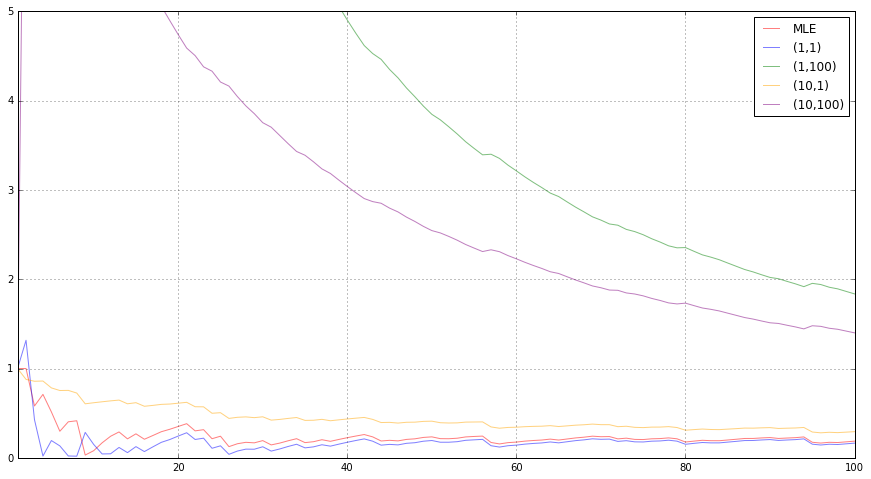

In [57]:
func_2()

В данной модели наилучшей оценкой является оценка максимального правдоподобия и байесовская оценка при априорном распределении, взятом с параметрами (1, 1).